In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import statistics
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("dataset_comb.csv")
data = data.sample(frac = 1)
data = data.drop(['id'], axis = 1)
data["Class"]=data["Class"].replace(to_replace='jasmine',value=0)
data["Class"]=data["Class"].replace(to_replace='Gonen',value=1)
data = data.to_numpy()
data_g = np.array_split(data, 7)

## Logistic Regression

In [3]:
lr_acc_log_test = []
lr_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = LogisticRegression(random_state = 0,max_iter=1000)
    model.fit(X_train,y_train)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    
    acc1_log = accuracy_score(y_test, pred_values_test)
    lr_acc_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(y_train, pred_values_train)
    lr_acc_log_train.append(acc2_log)
    
print("Mean accuracy for test set = ", statistics.mean(lr_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(lr_acc_log_train))


Mean accuracy for test set =  0.9894967380452053
Mean accuracy for train set =  0.9893318620462295


## Linear Discriminant Analysis

In [4]:
lda_acc_log_test = []
lda_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = LinearDiscriminantAnalysis()
    model.fit(X_train,y_train)
    #pred_values = model.predict(X_test)
    #lda_acc = accuracy_score(pred_values , y_test)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    #test_pred_y_log = clf.predict(test_data_xn)
    #train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_lda = accuracy_score(y_test, pred_values_test)
    lda_acc_log_test.append(acc1_lda)
    
    acc2_lda = accuracy_score(y_train, pred_values_train)
    lda_acc_log_train.append(acc2_lda)
    
print("Mean accuracy for test set = ", statistics.mean(lda_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(lda_acc_log_train))
#print('Accuracy of each test fold - {}'.format(lda_acc_score))

Mean accuracy for test set =  0.9866372898268824
Mean accuracy for train set =  0.9868023091691969


## Naive Bayes

In [5]:
nb_acc_log_test = []
nb_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = GaussianNB()
    model.fit(X_train,y_train)
    #pred_values = model.predict(X_test)
    #nb_acc = accuracy_score(pred_values , y_test)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    #test_pred_y_log = clf.predict(test_data_xn)
    #train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(y_test, pred_values_test)
    nb_acc_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(y_train, pred_values_train)
    nb_acc_log_train.append(acc2_log)
    
print("Mean accuracy for test set = ", statistics.mean(nb_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(nb_acc_log_train))
#print('Accuracy of each test fold - {}'.format(nb_acc_score))

Mean accuracy for test set =  0.9767938337601682
Mean accuracy for train set =  0.9769223667829512


## Neural Networks

In [6]:
ann_acc_log_test = []
ann_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = MLPClassifier()
    model.fit(X_train,y_train)
    #pred_values = model.predict(X_test)
    #ann_acc = accuracy_score(pred_values , y_test)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    #test_pred_y_log = clf.predict(test_data_xn)
    #train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_ann = accuracy_score(y_test, pred_values_test)
    ann_acc_log_test.append(acc1_ann)
    
    acc2_ann = accuracy_score(y_train, pred_values_train)
    ann_acc_log_train.append(acc2_ann)
    
print("Mean accuracy for test set = ", statistics.mean(ann_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(ann_acc_log_train))
#print('Accuracy of each test fold - {}'.format(ann_acc_score))

Mean accuracy for test set =  0.9733298846078648
Mean accuracy for train set =  0.9747960098088284


## Perceptron

In [7]:
pp_acc_log_test = []
pp_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = Perceptron(tol = 1e-3, random_state=0)
    model.fit(X_train,y_train)
    #pred_values = model.predict(X_test)
    #pp_acc = accuracy_score(pred_values , y_test)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    #test_pred_y_log = clf.predict(test_data_xn)
    #train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_pp = accuracy_score(y_test, pred_values_test)
    pp_acc_log_test.append(acc1_pp)
    
    acc2_pp = accuracy_score(y_train, pred_values_train)
    pp_acc_log_train.append(acc2_pp)
    
print("Mean accuracy for test set = ", statistics.mean(pp_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(pp_acc_log_train))
#print('Accuracy of each test fold - {}'.format(ann_acc_score))

Mean accuracy for test set =  0.9192223928658133
Mean accuracy for train set =  0.9192277148873966


## SVM

In [8]:
svc_acc_log_test = []
svc_acc_log_train = []
for i in range(7):
    test_data = data_g[i]
    X_test = []
    y_test = []
    X_train = []
    y_train = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                X_train.append(data_g[j][w][:10])
                y_train.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                X_test.append(data_g[j][w][:10])
                y_test.append(data_g[j][w][10])
                
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    model = SVC(kernel = 'rbf')
    model.fit(X_train,y_train)
    #pred_values = model.predict(X_test)
    #lr_acc = accuracy_score(pred_values , y_test)
    
    #predict class
    pred_values_test = model.predict(X_test)
    pred_values_train = model.predict(X_train)
    #test_pred_y_log = clf.predict(test_data_xn)
    #train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(y_test, pred_values_test)
    svc_acc_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(y_train, pred_values_train)
    svc_acc_log_train.append(acc2_log)
    
print("Mean accuracy for test set = ", statistics.mean(svc_acc_log_test))
print("Mean accuracy for train set = ", statistics.mean(svc_acc_log_train))
#print('Accuracy of each test fold - {}'.format(lr_acc_score))

Mean accuracy for test set =  0.9264778862124707
Mean accuracy for train set =  0.9264687006015904


### Box Plots

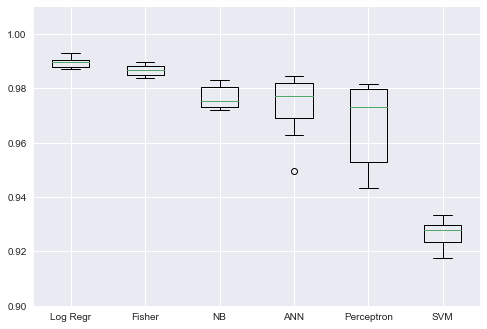

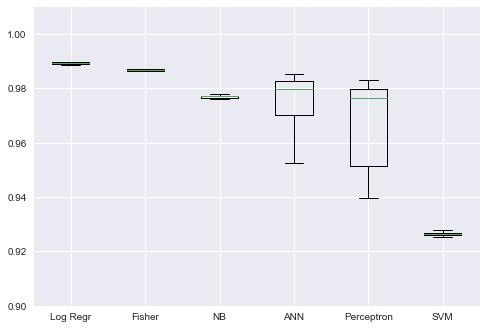

In [18]:
fig, ax = plt.subplots()
ax.boxplot([lr_acc_log_test, lda_acc_log_test, nb_acc_log_test, ann_acc_log_test, pp_acc_log_test,svc_acc_log_test])
ax.set_xticklabels(['Log Regr','Fisher','NB','ANN','Perceptron','SVM'])
plt.ylim([0.9,1.01])
plt.show()

fig, ax = plt.subplots()
ax.boxplot([lr_acc_log_train, lda_acc_log_train, nb_acc_log_train, ann_acc_log_train, pp_acc_log_train,svc_acc_log_train])
ax.set_xticklabels(['Log Regr','Fisher','NB','ANN','Perceptron','SVM'])
plt.ylim([0.9,1.01])
plt.show()